# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

# Impor the OpenWeatherMap API key
import api_keys

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"           #setting up base url
apikey=api_keys.weather_api_key                                    #setting up api keys

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={apikey}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = (city_weather["main"]["temp_max"])- (273.15)     # converting temperature to deg celcius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp(C)": city_max_temp,
                          "Humidity(%)": city_humidity,
                          "Cloudiness(%)": city_clouds,
                          "Wind Speed(mph)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | hachinohe
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | maun
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | abu jibeha
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | nizhnesortymskiy
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 

Processing Record 40 of Set 4 | mount pearl
Processing Record 41 of Set 4 | lyubim
Processing Record 42 of Set 4 | remire-montjoly
Processing Record 43 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 44 of Set 4 | nikolayevsk-on-amure
Processing Record 45 of Set 4 | port saint john's
Processing Record 46 of Set 4 | minas de marcona
Processing Record 47 of Set 4 | kuloy
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | castillos
Processing Record 0 of Set 5 | la sarre
Processing Record 1 of Set 5 | serdar
Processing Record 2 of Set 5 | burao
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | crockett
Processing Record 5 of Set 5 | punta arenas
Processing Record 6 of Set 5 | hami
Processing Record 7 of Set 5 | keflavik
Processing Record 8 of Set 5 | ribadesella
Processing Record 9 of Set 5 | kurayoshi
Processing Record 10 of Set 5 | fuling
Processing Record 11 of Set 5 | carlsbad
Processing Record 12 of Set 5 | merizo villa

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City               551
Lat                551
Lng                551
Max Temp(C)        551
Humidity(%)        551
Cloudiness(%)      551
Wind Speed(mph)    551
Country            551
Date               551
dtype: int64

In [82]:
# Display sample data
city_data_df.sample(5)

,City,Lat,Lng,Max Temp(C),Humidity(%),Cloudiness(%),Wind Speed(mph),Country,Date
184,tarakan,3.3000,117.6333,26.72,94,75,1.03,ID,1702004511
286,urengoy,65.9667,78.3667,-27.80,97,62,5.13,RU,1702004549
86,yeppoon,-23.1333,150.7333,29.88,61,29,8.07,AU,1702004466
47,burang,30.2500,81.1667,-9.33,56,0,1.39,CN,1702004453
32,greymouth,-42.4667,171.2000,15.93,64,16,3.88,NZ,1702004447


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(5)

,City,Lat,Lng,Max Temp(C),Humidity(%),Cloudiness(%),Wind Speed(mph),Country,Date
City_ID,,,,,,,,,
406,hirara,24.8000,125.2833,24.15,60,20,5.66,JP,1702004611
503,belo sur tsiribihina,-19.7000,44.5500,24.23,91,95,2.08,MG,1702004650
65,plastun,44.7561,136.2939,-3.12,42,100,1.81,RU,1702004459
230,el alto,-4.2714,-81.2147,19.81,84,94,4.85,PE,1702004528
116,kindu,-2.9500,25.9500,20.96,100,99,0.52,CD,1702004477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

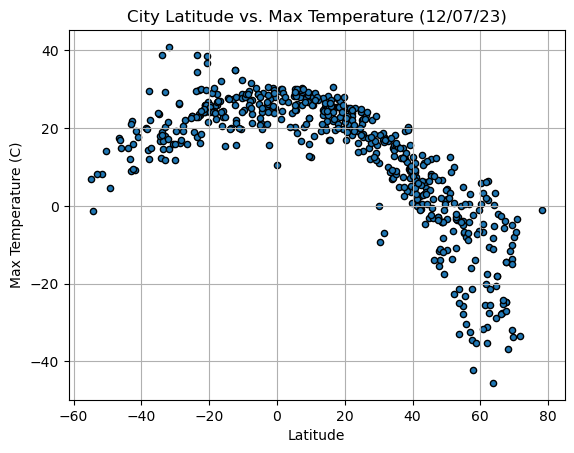

In [85]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
scatter_plot1 = city_data_df.plot(x="Lat", y="Max Temp(C)", kind="scatter",edgecolor="black",grid=True)
# Incorporate the other graph properties
# YOUR CODE HERE
scatter_plot1.set_xlabel("Latitude")
scatter_plot1.set_ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

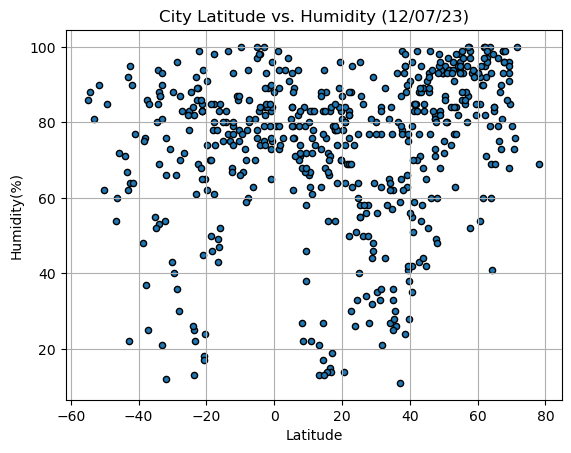

In [86]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
scatter_plot2 = city_data_df.plot(x="Lat", y="Humidity(%)", kind="scatter",edgecolor="black",grid=True)
# Incorporate the other graph properties
# YOUR CODE HERE
scatter_plot2.set_xlabel("Latitude")
scatter_plot2.set_ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

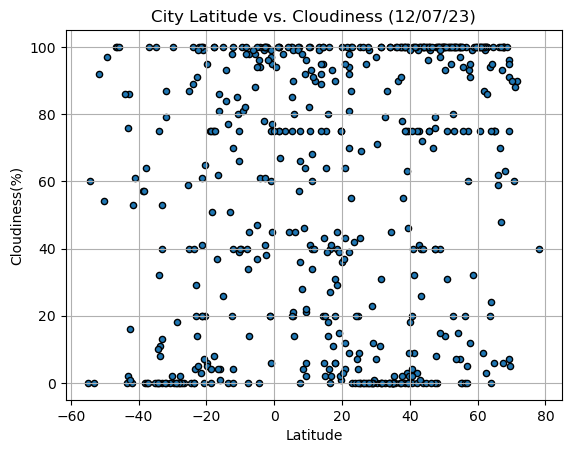

In [87]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
scatter_plot3 = city_data_df.plot(x="Lat", y="Cloudiness(%)", kind="scatter",edgecolor="black",grid=True)
# Incorporate the other graph properties
# YOUR CODE HERE
scatter_plot3.set_xlabel("Latitude")
scatter_plot3.set_ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

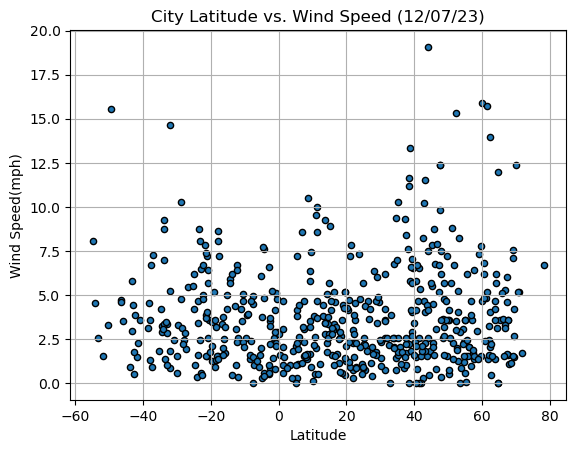

In [88]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
scatter_plot4 = city_data_df.plot(x="Lat", y="Wind Speed(mph)", kind="scatter",edgecolor="black",grid=True)
# Incorporate the other graph properties
# YOUR CODE HERE
scatter_plot4.set_xlabel("Latitude")
scatter_plot4.set_ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,title,text_coordinates,ylabel):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    print(line_eq)
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=12, color="red")
    plt.xlabel("Latitude")
    # Add ylabel
    plt.ylabel(ylabel)
    
    print(f"The r-squared is: {rvalue}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
city_data_north = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
city_data_north.sample(5)

,City,Lat,Lng,Max Temp(C),Humidity(%),Cloudiness(%),Wind Speed(mph),Country,Date
City_ID,,,,,,,,,
231,churapcha,62.0025,132.4325,-31.24,97,100,3.24,RU,1702004528
381,pultusk,52.7025,21.0828,-3.28,96,20,1.97,PL,1702004604
374,bojnurd,37.4747,57.3290,4.97,65,0,1.03,IR,1702004602
78,dongfeng,42.6403,125.5118,6.46,77,41,8.24,CN,1702004464
244,vega de alatorre,20.0333,-96.6333,21.47,87,100,2.09,MX,1702004532


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
city_data_south = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
city_data_south.sample(5)

,City,Lat,Lng,Max Temp(C),Humidity(%),Cloudiness(%),Wind Speed(mph),Country,Date
City_ID,,,,,,,,,
242,uturoa,-16.7333,-151.4333,27.03,78,37,3.37,PF,1702004532
264,gandu,-13.7439,-39.4867,19.74,99,77,0.47,BR,1702004541
505,francisco sa,-16.4758,-43.4883,24.08,49,4,1.57,BR,1702004651
69,rabaul,-4.1967,152.1721,29.00,74,61,7.63,PG,1702004460
234,port mathurin,-19.6833,63.4167,25.94,74,6,3.48,MU,1702004464


###  Temperature vs. Latitude Linear Regression Plot

y = -0.75 x + 34.83
The r-squared is: -0.8625270053534291


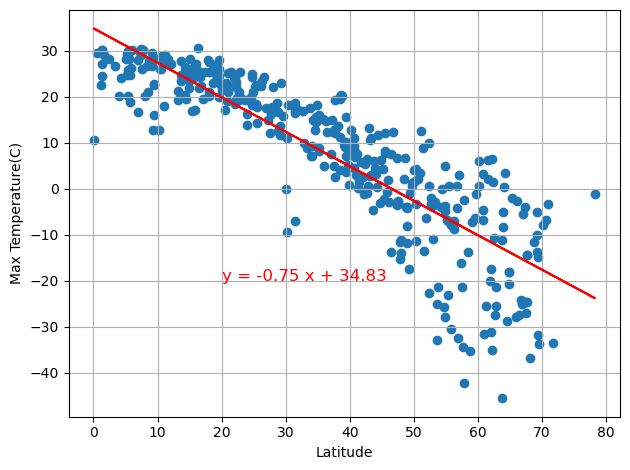

In [92]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Build scatter plot for each data type:
x_values = city_data_north["Lat"]
y_values = city_data_north["Max Temp(C)"]
plot_linear_regression(x_values, y_values, 'Max Temperature(C)', (20, -20), 'Max Temperature(C)')

y = 0.29 x + 28.97
The r-squared is: 0.5908247503138381


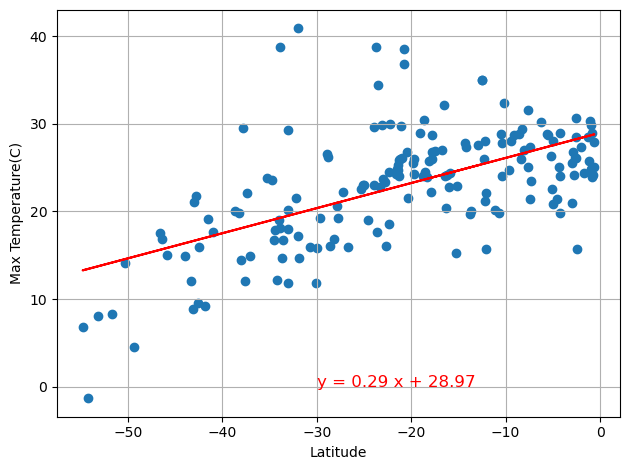

In [93]:
# Linear regression on Southern Hemisphere
x_values = city_data_south["Lat"]
y_values = city_data_south["Max Temp(C)"]
plot_linear_regression(x_values, y_values, 'Max Temperature(C)', (-30,0), 'Max Temperature(C)')

**Discussion about the linear relationship:** 
Temperature vs. Latitude Linear Regression
North:
The negative coefficient (-0.75) suggests that as 'x' increases, 'y' is expected to decrease.
The intercept (34.83) is the expected value of 'y' when 'x' is zero.
The negative r^2 value implies that the linear model doesn't fit the data well, and it might not be a suitable model for describing the relationship.


South:
The positive coefficient (0.29) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (28.97) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.59 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a moderate fit to the data.

### Humidity vs. Latitude Linear Regression Plot

y = 0.34 x + 61.88
The r-squared is: 0.31084751191329973


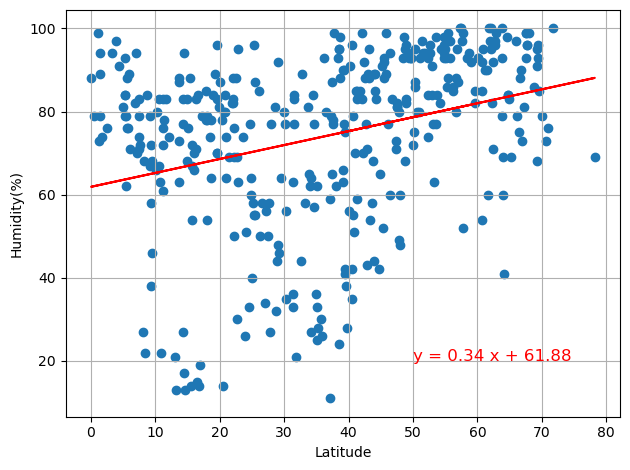

In [94]:
# Northern Hemisphere
# YOUR CODE HERE
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Build scatter plot for each data type:
x_values = city_data_north["Lat"]
y_values = city_data_north["Humidity(%)"]
plot_linear_regression(x_values, y_values, 'Humidity(%)', (50,20), 'Humidity(%)')

y = 0.31 x + 79.33
The r-squared is: 0.21677492783774163


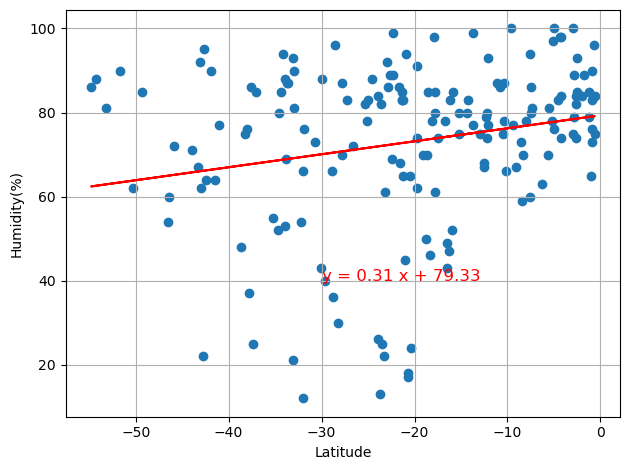

In [95]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = city_data_south["Lat"]
y_values = city_data_south["Humidity(%)"]
plot_linear_regression(x_values, y_values, 'Humidity(%)', (-30,40), 'Humidity(%)')

**Discussion about the linear relationship:** 
Humidity vs. Latitude Linear Regression Plot
North:
The positive coefficient (0.34) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (61.88) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.31 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a limited fit to the data.

South:
The positive coefficient (0.31) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (79.33) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.22 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a limited fit to the data.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.34 x + 46.86
The r-squared is: 0.16565445636628348


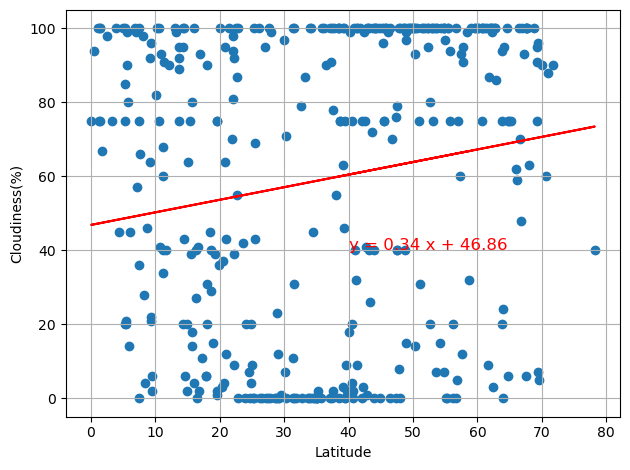

In [96]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = city_data_north["Lat"]
y_values = city_data_north["Cloudiness(%)"]
plot_linear_regression(x_values, y_values, 'Cloudiness(%)', (40,40), 'Cloudiness(%)')

y = 0.77 x + 66.15
The r-squared is: 0.27066874599305835


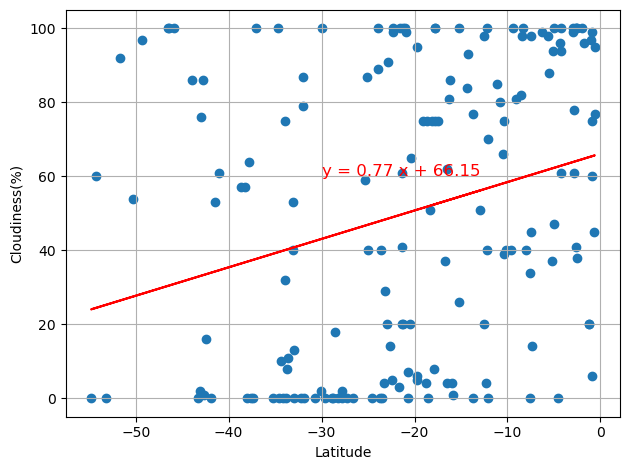

In [97]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = city_data_south["Lat"]
y_values = city_data_south["Cloudiness(%)"]
plot_linear_regression(x_values, y_values, 'Cloudiness(%)', (-30,60), 'Cloudiness(%)')

**Discussion about the linear relationship:** 
Cloudiness vs. Latitude Linear Regression Plot
North:
The positive coefficient (0.34) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (46.86) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.17 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a limited fit to the data.

South:
The positive coefficient (0.77) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (66.15) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.27 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a moderate fit to the data.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02 x + 2.83
The r-squared is: 0.15151891765073328


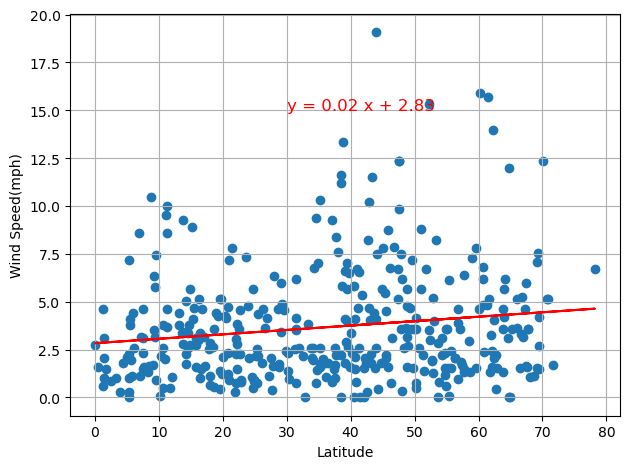

In [98]:
# Northern  Hemisphere
# YOUR CODE HERE
x_values = city_data_north['Lat']
y_values = city_data_north['Wind Speed(mph)']
plot_linear_regression(x_values, y_values, 'Wind Speed(mph)', (30,15), 'Wind Speed(mph)')

y = -0.03 x + 2.95
The r-squared is: -0.17235716797876366


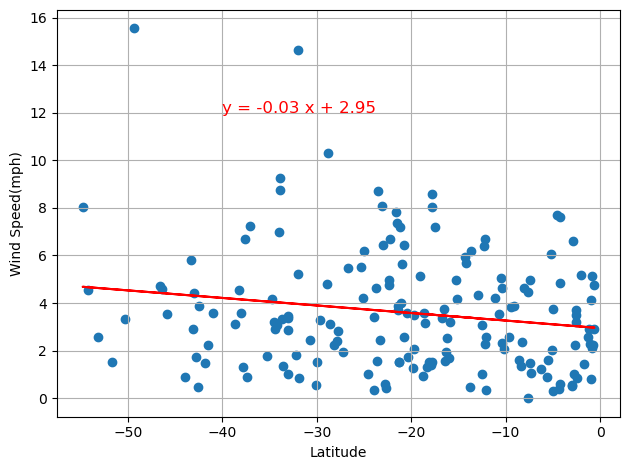

In [99]:
# Southern  Hemisphere
# YOUR CODE HERE
x_values = city_data_south['Lat']
y_values = city_data_south['Wind Speed(mph)']
plot_linear_regression(x_values, y_values, 'Wind Speed(mph)', (-40,12), 'Wind Speed(mph)')

**Discussion about the linear relationship:** 
Wind Speed vs. Latitude Linear Regression Plot

North:
The positive coefficient (0.02) suggests that as 'x' increases, 'y' is expected to increase.
The intercept (2.83) is the expected value of 'y' when 'x' is zero.
The r^2 value of 0.15 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The positive r^2 value suggests that the linear model provides a limited fit to the data.

South
The negative coefficient (-0.03) suggests that as 'x' increases, 'y' is expected to decrease.
The intercept (2.95) is the expected value of 'y' when 'x' is zero.
The r^2 value of -0.17 indicates the proportion of the variance in 'y' that is explained by changes in 'x' according to the linear model. The negative r^2 value suggests that the linear model does not fit the data well, and it might not be a suitable model for describing the relationship.